# Assignment 1: Naive Bayes [20 marks]

Student Name: -

Student ID: -

## General info

<b>Due date</b>: Friday, 8 April 2022 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>: 20% of mark for class.

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/124196/pages/python-and-jupyter-notebooks?module_item_id=3512182) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn, and Gensim. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should implement functions for the skeletons listed below. You may implement any number of additional (helper) functions. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions.

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 4 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the five specified Python functions work in a manner consistent with the materials from COMP90049. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A2); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions:
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -10.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -5.0
</UL>

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the features as continuous numeric and use them as provided (e.g., do **not** convert them to other feature types, such as discrete ones). Implement a Naive Bayes classifier with appropriate likelihood function for the data
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
5. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)*

In [ ]:
# This function should open a csv file and read the data into a useable format [1 mark]
def preprocess(filename):
    data = open(filename, 'r').readlines()


    header = data[0].strip().split(',')[2:]
    instances = data[1:]
    features,labels = [],[]

    for i in range(len(instances)):
        instance = instances[i] # getting each instance of data
        instance = instance.strip() # strip the string
        instance = instance.split(',') # splite by , and make our lists
        labels.append(instance[1])
        features.append(instance[2:])
    return header,features,labels,instances

In [ ]:
# This function should build a supervised NB model [3 marks]
def train(header,features,labels):

    counts_of_classes = Counter(labels)
    prior_probs_y = dict()
    Sum_of_number_of_classes = sum(counts_of_classes.values())
    for label in counts_of_classes:
        prior_probs_y[label] = counts_of_classes[label]/Sum_of_number_of_classes
        #print("prior prob for _{}_ : {}/{} = {}".format(label,counts_of_classes[label],Sum_of_number_of_classes,(counts_of_classes[label]/Sum_of_number_of_classes)))

    #print(prior_probs_y)

    reverse_features = [[features[j][i] for j in range(len(features))] for i in range(len(features[0]))]

    #print()
    dict_dict_of_features = defaultdict(dict) #cols
    dict_list_of_labels = defaultdict(list) #labels

    final_trained_probs = {}

    for j in set(labels):
        dict_list_of_labels[j] = list()

    for i in header:
        dict_dict_of_features[i] = dict(dict_list_of_labels)
        final_trained_probs[i] = dict(dict_list_of_labels)

    dict_dict_of_features = dict(dict_dict_of_features)
    for inst in range(len(features)):
        for attr in range(len(features[inst])):
            #print("row {} col {} header {} lable {} feature {}".format(inst,attr,header[attr],labels[inst],features[inst][attr]))
            if type(dict_dict_of_features[header[attr]][labels[inst]]) != list():
                dict_dict_of_features[header[attr]][labels[inst]] = list(dict_dict_of_features[header[attr]][labels[inst]])

            dict_dict_of_features[header[attr]][labels[inst]].append(float(features[inst][attr]))


    for i in dict_dict_of_features:
        mean = 0
        sd = 0
        for j in dict_dict_of_features[i]:
            #print(i,j,dict_dict_of_features[i][j])
            mean = sum(dict_dict_of_features[i][j])/len(dict_dict_of_features[i][j])
            nominator = 0
            for c in dict_dict_of_features[i][j]:
                nominator = (c-mean)**2 + nominator
            sd = math.sqrt(nominator/len(dict_dict_of_features[i][j]))

            #print("P({}|{}): \nmean: {}\nsd: {}".format(i,j,mean,sd))

            final_trained_probs[i][j] = [mean,sd]

        #print()
    #print(final_trained_probs)
    return final_trained_probs,prior_probs_y

In [ ]:
# This function should predict the class for a set of instances, based on a trained model [2 marks]
def predict(test_instances,prior_probs_y):

    predicts = float()
    predict_probs = []
    test_results = []
    for instance in range(len(test_instances)):
        flag = 0
        for c in set(labels):
            priorProb = prior_probs_y[c]
            likelihoodForClass = math.log(priorProb)
            #print(test_instances[instance])
            for feature in range(len(test_instances[instance])):
            #calculate for each class

                appropriate_sd = final_trained_probs[header[feature]][c][1]
                appropriate_mean = final_trained_probs[header[feature]][c][0]
                a = 2*3.14*(appropriate_sd**2)
                b = math.exp(((float(test_instances[instance][feature])-appropriate_mean)**2)/(-2*(appropriate_sd**2)))
                #print(b,a)
                if b == 0 or a==0:
                    likelihoodForClass = likelihoodForClass + 0 + 0.000000001 #sol 2
                else:
                    likelihoodForClass = likelihoodForClass + math.log(b/a) + 0.000000001 #sol 2

                #print(header[feature],c,final_trained_probs[header[feature]][c],prior_probs_y[c])
            #predicts[c] = float(likelihoodForClass)
            #print(c,likelihoodForClass)
            if flag == 1:
                if predicts<likelihoodForClass:
                    predicts = likelihoodForClass
                    predict_class = c
                else:
                    continue
            predicts = likelihoodForClass
            predict_class = c
            flag =1
        test_results.append(predict_class)
        predict_probs.append(predicts)
        #print(predicts,predict_class)
    return test_results,predict_probs

In [ ]:
# This function should evaluate a set of predictions [1 mark]
def evaluate(test_predictions,lables):
    #print(len(test_predictions),len(lables))
    correctCount = 0
    for i in range(len(test_predictions)):
        if test_predictions[i] == lables[i]:
            correctCount += 1
    return correctCount/len(test_predictions)

In [ ]:
# This cell should act as your "main" function where you call the above functions
# on the full OBJECTIVITY data set, and print the evaluation score. [0.33 marks]

from collections import defaultdict,Counter
import math
# First, read in the data and apply your NB model to the OBJECTIVITY data

    # adult.csv
    # absenteeism.csv
    # objectivity.csv
header,features,labels,instances = preprocess('adult.csv ')
final_trained_probs,prior_probs_y = train(header,features,labels)
test_predictions,predict_probs = predict(features,prior_probs_y)
# Second, print the full evaluation results from the evaluate() function

accuracy = evaluate(test_predictions,labels)
print(accuracy)



# Third, print data statistics and model predictions, as instructed below
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Feature vectors of instances [0, 1, 2]: ", instances[0:3])# in features first 2 cols didnt considered

print("\nNumber of instances (N): ", len(instances))
print("Number of features (F): ", len(header)+2)
print("Number of labels (L): ", len(labels))

print("\n\nPredicted class probabilities for instance N-3: ", predict_probs[-3])
print("Predicted class ID for instance N-3: ", test_predictions[-3])
print("\nPredicted class probabilities for instance N-2: ", predict_probs[-2])
print("Predicted class ID for instance N-2: ", test_predictions[-2])
print("\nPredicted class probabilities for instance N-1: ", predict_probs[-1])
print("Predicted class ID for instance N-1: ", test_predictions[-1])



0.8088
Feature vectors of instances [0, 1, 2]:  ['CLI0001,<=50K,31,142470,13,0,0,40\n', 'CLI0002,<=50K,31,323069,9,0,0,20\n', 'CLI0003,<=50K,25,122489,13,0,1726,60\n']

Number of instances (N):  2500
Number of features (F):  8
Number of labels (L):  2500


Predicted class probabilities for instance N-3:  -74.7307371646144
Predicted class ID for instance N-3:  <=50K

Predicted class probabilities for instance N-2:  -72.53020523703248
Predicted class ID for instance N-2:  <=50K

Predicted class probabilities for instance N-1:  -72.19273360177912
Predicted class ID for instance N-1:  <=50K


In [ ]:
# This cell should act as your "main" function where you call the above functions
# on the full ADULT data set, and print the evaluation score. [0.33 marks]



from collections import defaultdict,Counter
import math
# First, read in the data and apply your NB model to the OBJECTIVITY data

    # adult.csv
    # absenteeism.csv
    # objectivity.csv
header,features,labels,instances = preprocess('absenteeism.csv')
final_trained_probs,prior_probs_y = train(header,features,labels)
test_predictions,predict_probs = predict(features,prior_probs_y)
# Second, print the full evaluation results from the evaluate() function

accuracy = evaluate(test_predictions,labels)
print(accuracy)




# Third, print data statistics and model predictions, as instructed below
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Feature vectors of instances [0, 1, 2]: ", instances[0:3])# in features first 2 cols didnt considered

print("\nNumber of instances (N): ", len(instances))
print("Number of features (F): ", len(header)+2)
print("Number of labels (L): ", len(labels))

print("\n\nPredicted class probabilities for instance N-3: ", predict_probs[-3])
print("Predicted class ID for instance N-3: ", test_predictions[-3])
print("\nPredicted class probabilities for instance N-2: ", predict_probs[-2])
print("Predicted class ID for instance N-2: ", test_predictions[-2])
print("\nPredicted class probabilities for instance N-1: ", predict_probs[-1])
print("Predicted class ID for instance N-1: ", test_predictions[-1])




0.28177641653905056
Feature vectors of instances [0, 1, 2]:  ['WOR0002,0,18,50,239.554,97,1,0,98,178,31\n', 'WOR0003,2,18,38,239.554,97,0,0,89,170,31\n', 'WOR0005,2,13,33,239.554,97,2,1,90,172,30\n']

Number of instances (N):  653
Number of features (F):  11
Number of labels (L):  653


Predicted class probabilities for instance N-3:  -58.3361743337936
Predicted class ID for instance N-3:  0

Predicted class probabilities for instance N-2:  -50.42320632661738
Predicted class ID for instance N-2:  3

Predicted class probabilities for instance N-1:  -49.20989652601107
Predicted class ID for instance N-1:  1


In [ ]:
# This cell should act as your "main" function where you call the above functions
# on the full ABSENTEEISM data set, and print the evaluation score. [0.33 marks]



from collections import defaultdict,Counter
import math
# First, read in the data and apply your NB model to the OBJECTIVITY data

    # adult.csv
    # absenteeism.csv
    # objectivity.csv
header,features,labels,instances = preprocess('objectivity.csv')
final_trained_probs,prior_probs_y = train(header,features,labels)
test_predictions,predict_probs = predict(features,prior_probs_y)
# Second, print the full evaluation results from the evaluate() function

accuracy = evaluate(test_predictions,labels)
print(accuracy)







# Third, print data statistics and model predictions, as instructed below
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Feature vectors of instances [0, 1, 2]: ", instances[0:3])# in features first 2 cols didnt considered

print("\nNumber of instances (N): ", len(instances))
print("Number of features (F): ", len(header)+2)
print("Number of labels (L): ", len(labels))

print("\n\nPredicted class probabilities for instance N-3: ", predict_probs[-3])
print("Predicted class ID for instance N-3: ", test_predictions[-3])
print("\nPredicted class probabilities for instance N-2: ", predict_probs[-2])
print("Predicted class ID for instance N-2: ", test_predictions[-2])
print("\nPredicted class probabilities for instance N-1: ", predict_probs[-1])
print("Predicted class ID for instance N-1: ", test_predictions[-1])



0.775
Feature vectors of instances [0, 1, 2]:  ['Text0001,objective,109,8,0,0,0,0,12,0,1,2,2,0,2,0,0,0,0,0,0,4,0,0,3\n', 'Text0002,objective,309,35,0,0,2,1,17,0,7,5,16,0,0,0,7,0,7,0,0,19,1,0,10\n', 'Text0003,objective,149,15,0,0,0,1,4,0,4,0,7,0,1,0,2,0,0,0,0,6,0,0,2\n']

Number of instances (N):  1000
Number of features (F):  25
Number of labels (L):  1000


Predicted class probabilities for instance N-3:  -151.97166615107932
Predicted class ID for instance N-3:  subjective

Predicted class probabilities for instance N-2:  -126.97785080761442
Predicted class ID for instance N-2:  objective

Predicted class probabilities for instance N-1:  -135.8391186834387
Predicted class ID for instance N-1:  objective


# Part 2: Conceptual questions [12 marks]

## Question 1: Evaluation strategy [3 marks]

In [ ]:
# Write additional code here, if necessary (you may insert additional code cells)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np

#CV
datasetNames = ['absenteeism.csv','adult.csv','objectivity.csv']
for i in datasetNames:

    header,features,labels,instances = preprocess(i)

    b = np.array(features, dtype=float) #  convert using numpy

    scores = cross_val_score(GaussianNB(), b, labels, cv=5, scoring="accuracy")

    print("CV * Accuracy - (Avg Acc) for dataset: {} = {}".format(i,sum(scores)/len(scores)))



CV * Accuracy - (Avg Acc) for dataset: absenteeism.csv = 0.2558191426893717
CV * Accuracy - (Avg Acc) for dataset: adult.csv = 0.804
CV * Accuracy - (Avg Acc) for dataset: objectivity.csv = 0.7899999999999999


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# hold out
datasetNames = ['absenteeism.csv','adult.csv','objectivity.csv']
for i in datasetNames:
    header,features,labels,instances = preprocess(i)

    b = np.array(features, dtype=float)
    X_train, X_test, y_train, y_test = train_test_split(b, labels, test_size=0.1, random_state=0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    s = accuracy_score(y_test, y_pred, sample_weight=None)
    print("Hold out * Accuracy - for dataset: {} = {}".format(i,s))

Hold out * Accuracy - for dataset: absenteeism.csv = 0.4090909090909091
Hold out * Accuracy - for dataset: adult.csv = 0.82
Hold out * Accuracy - for dataset: objectivity.csv = 0.78


datasets real labels and predicted ones


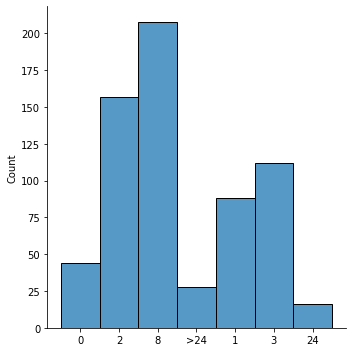

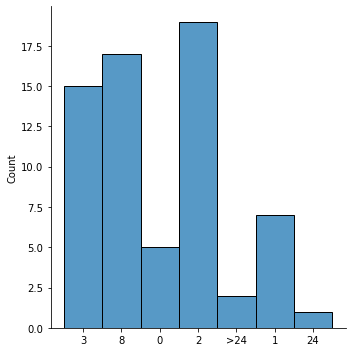

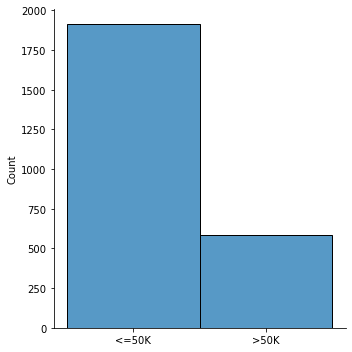

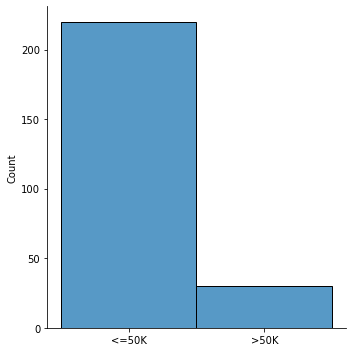

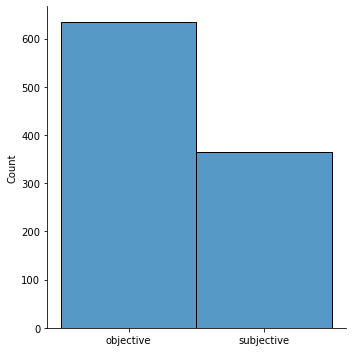

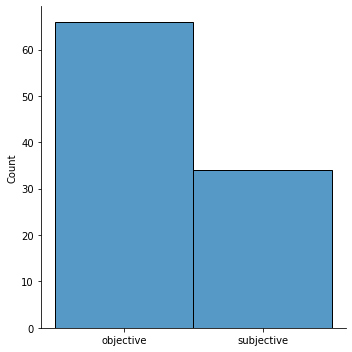

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
datasetNames = ['absenteeism.csv','adult.csv','objectivity.csv']
for i in datasetNames:
    header,features,labels,instances = preprocess(i)
    b = np.array(features, dtype=float)
    X_train, X_test, y_train, y_test = train_test_split(b, labels, test_size=0.1, random_state=0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    sns.displot(labels)
    sns.displot(y_pred)
print("datasets real labels and predicted ones")

Provide your text answer of 100-150 words in this cell.

using sklearn Gassian Naive bayes and accuracy metric for evaluation, shows cross validation(CV) strategy did not have much affect on accuracy. While expectation of CV is to see more of data during training phase.
reducing cross validation folds would only reduce the accuracy of model. increasing it to nearly N (number of dataset rows) bringing the idea of hold out. Hold out seems to perform better on accuracy of these datasets.(both methods tested above)
CV was sopposed to be a better approach since datasets are small in this assignment.
finally estimate of effectiveness didnt change by using CV however hold out relatively performed better on 'absenteeism'. It can be a result of conditionally independant assumption in NB.

## Question 2: Feature standardization [2 marks]

In [ ]:
# Write additional code here, if necessary (you may insert additional code cells)

from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# hold out
datasetNames = ['absenteeism.csv','adult.csv','objectivity.csv']
for i in datasetNames:
    header,features,labels,instances = preprocess(i)
    x = np.array(features)
    scaler = preprocessing.StandardScaler().fit(x)
    X_scaled = scaler.transform(x)


    X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.1, random_state=0)


    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    s = accuracy_score(y_test, y_pred, sample_weight=None)
    print("Hold out * Accuracy - for dataset: {} = {}".format(i,s))


    header,features,labels,instances = preprocess(i)


    scores = cross_val_score(GaussianNB(), X_scaled, labels, cv=5, scoring="accuracy")

    print("CV * Accuracy - (Avg Acc) for dataset: {} = {}".format(i,sum(scores)/len(scores)))

Hold out * Accuracy - for dataset: absenteeism.csv = 0.4090909090909091
CV * Accuracy - (Avg Acc) for dataset: absenteeism.csv = 0.2558191426893717
Hold out * Accuracy - for dataset: adult.csv = 0.82
CV * Accuracy - (Avg Acc) for dataset: adult.csv = 0.8044
Hold out * Accuracy - for dataset: objectivity.csv = 0.78
CV * Accuracy - (Avg Acc) for dataset: objectivity.csv = 0.7899999999999999


Provide your text answer of 100-150 words in this cell.

feature standardization rescale features not normalize. It can spread values around the mean. In this case meaning stadardising probabilities and we used sklearn StandardScaler() to spread data around 0. It shows that even after rescaling,results are exactly the same.
standardization does not matter in gassian NB. My believe is that since its independently calculate the continuous values and we already calculated it aruund variance and mean on each column(feature) there is no change.

## Question 3: Naive Bayes assumptions [2 marks]

In [ ]:
# Write additional code here, if necessary (you may insert additional code cells)

Provide your text answer of 100-150 words in this cell.

features of an instance are conditionally independant. (assumed) : P(Xi|Yi)

instances are independant - conditioned on class y : P(Yi)

in absenteeism.csv for example we see these headers:
Weight,Height,Body mass index
they are dependent to each other but we are assuming that they are independant.
in objectivity.csv for example we are working with word counds and their frequency types. considering these independencies are an example of good independant assumption.

## Question 4: Feature Selection and Ethics [5 marks]
- Question 4.1: [3.5 marks]
- Question 4.2: [1.5 mark]

In [ ]:
# Write additional code here, if necessary (you may insert additional code cells)
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = open('adult_nominal_for_q4.csv', 'r').readlines()
# ignore the ? containing instances

header = data[0].strip().split(',')
instances = data[1:]
features,labels = [],[]

for i in range(len(instances)):
    corrupted = 0
    instance = instances[i] # getting each instance of data
    instance = instance.strip() # strip the string
    instance = instance.split(',') # splite by , and make our lists
    #print(instance)
    for j in instance:

        if j=="?":
            corrupted = 1
    if corrupted == 0:
        labels.append(instance[1])
        features.append(instance[2:])

    else:
        #print(instance)
        continue


enc = OneHotEncoder(handle_unknown='ignore')
X = features
xfit = enc.fit(X)

#print(enc.categories_)
#print(enc.transform(X).toarray())
mi = mutual_info_classif(enc.transform(X).toarray(), labels)
aaaa = 0
for i in enc.categories_:
    print(i)
    aaaa = len(i) + aaaa
#print(len(mi))
#print(aaaa)
print(mi)

['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov']
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
['Divorced' 'Married-civ-spouse' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
['Female' 'Male']
['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Hong' 'Hungary' 'India' 'Iran' 'Italy' 'Jamaica' 'Japan' 'Laos'
 'Mexico' 'Nicaragua' 'Peru' 'P

In [ ]:
aaaa = 0
holder = 0
colsum = []
for i in range(len(enc.categories_)):
    aaaa = len(enc.categories_[i]) + aaaa

    #print(aaaa)
    if holder==0:
        #print(holder,aaaa,mi[holder:aaaa],sum(mi[holder:aaaa]))
        colsum.append(sum(mi[holder:aaaa]))
    else:
        #print(holder+1,aaaa)
        colsum.append(sum(mi[holder+1:aaaa]))
    holder = aaaa
#print(header[2:])
#print(colsum)
h = header[2:]
for i in range(len(h)):
    print("sum of pmi for {}={}".format(h[i],colsum[i]))

sum of pmi for Workclass=0.021130736120140714
sum of pmi for Education=0.17185503309492933
sum of pmi for Marital-status=0.18273306983691917
sum of pmi for Occupation=0.07250435317190274
sum of pmi for Relationship=0.07810378099343374
sum of pmi for Race=0.0014572644373458399
sum of pmi for Sex=0.02479175022993707
sum of pmi for Native-country=0.09483388783233782


Provide your text answer to **Question 4.1** of 100-150 words in this cell.

Mutual Information (MI) is about joint probabilities over individual probs. the more features are independant the more they get near to 0. Here PMI considered as point of MI.
Nominal data was first transformed to descrete. In our case, One hot encoding used and then these new feature colums helped to calculate PMI using sklearn.
for example:

for the fisr column we could have these values:
['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov']

their MI is equal:
[0.         0.         0.         0.01034361 0.00415894 0.00662819]

those with 0 meaning they are independant for getting our outcome classes.
for those more than 0 we have probability more than randome to occure while class is apeared.
It is also should be mentioned that, rows with value ? did not considered in model.

Provide your text answer to **Question 4.2** of 50-100 words in this cell.

I believe it is not ethical to use our whole data set
since it increase the bias and reduce variance meaning we can not perform on new unseen datas effeciently.
as it is shown there are some attributes that are not making any correlation with seeing data labels in this data set like Federal-gov. and intuitively it is undrestandable in some cases as well.
as an instance Relationship as shown above has lowest correlation and lowest pmi. so we ncan discard this feature in our model.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: -
   
   <b>Dated</b>: 8/04/2022